In [8]:
import pandas as pd
import numpy as np
import os, yaml, json, sys
import matplotlib.pyplot as plt
sys.path.append('../../')
from utility.scripts.tblogs_utility import get_results

In [11]:
basepath = "/home/masc12/dev/masc12-mthesis/poc_multiple/tblogs/fh10-LitRsMultipleModel/"
experiments = sorted(os.listdir(basepath))
experiments.remove("seed41-pvinjection(late,noearlystopping)")
results = {e: get_results(os.path.join(basepath, e)) for e in experiments}

results has the following structure:

```python
{
    'seed41-defaultmodel'       : pd.Dataframe,
    'seed41-sunposition(late)'  : pd.Dataframe,
    'seed41-pvinjection(late)'  : pd.Dataframe,
    ...
}
```

one of these dataframes looks as follows:

|    | location   |     mae |    rmse | exp                 |
|---:|:-----------|--------:|--------:|:--------------------|
|  0 | altenrhein | 193.551 | 336.961 | 2025-03-18_15-12-30 |
|  1 | kronberg   | 169.037 | 291.548 | 2025-03-18_15-34-04 |
| ...|         ...|      ...|      ...|                  ...|







# mean over experiments (per location)

In [12]:
locations = []
for exp in experiments:
    locations = list(set(locations + results[exp]["location"].tolist()))
locations = sorted(locations, key=len)


rmses = []
maes = []
for loc in locations:
    loc_mae = []
    loc_rmse = []
    
    for exp in experiments:
        df = results[exp]
        if loc in df["location"].tolist():
            loc_rmse.append(df[df["location"] == loc]["rmse"])
            loc_mae.append(df[df["location"] == loc]["mae"])
    
    rmses.append(np.mean(loc_rmse))
    maes.append(np.mean(loc_mae))

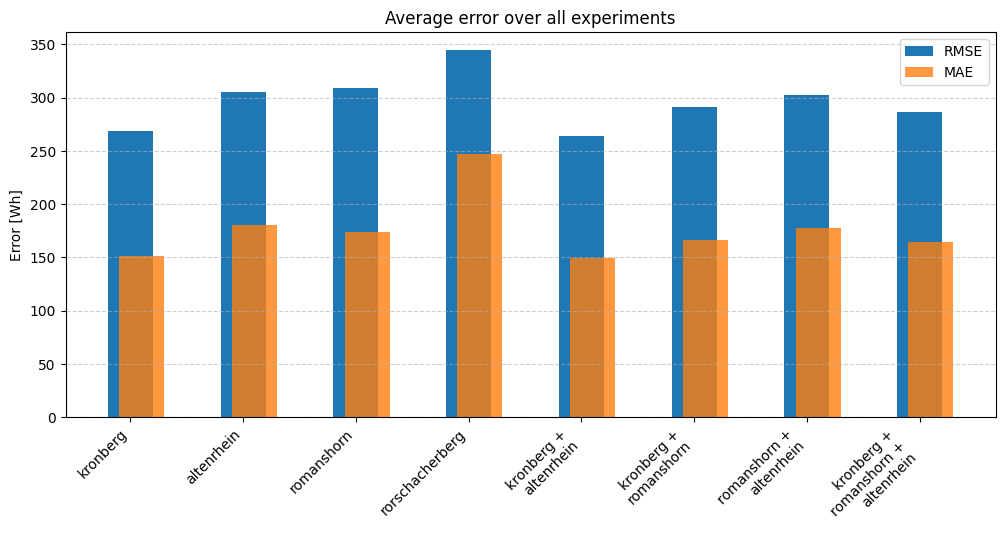

In [13]:
# Reverse sort by RMSE
x = np.arange(len(rmses))
width = 0.4

plt.figure(figsize=(12, 5))

plt.bar(x, rmses, width, label='RMSE')
plt.bar(x + 0.1, maes, width, label='MAE', alpha=0.8)  # Adjust the offset as needed

plt.xticks(x, locations, rotation=45, ha='right')
plt.ylabel('Error [Wh]')

plt.title('Average error over all experiments')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# mean over locations (per experiment)

In [14]:
rmses = []
maes = []
for i, key in enumerate(experiments):
    df = results[key]
    rmses.append(df['rmse'].mean())
    maes.append(df['mae'].mean())

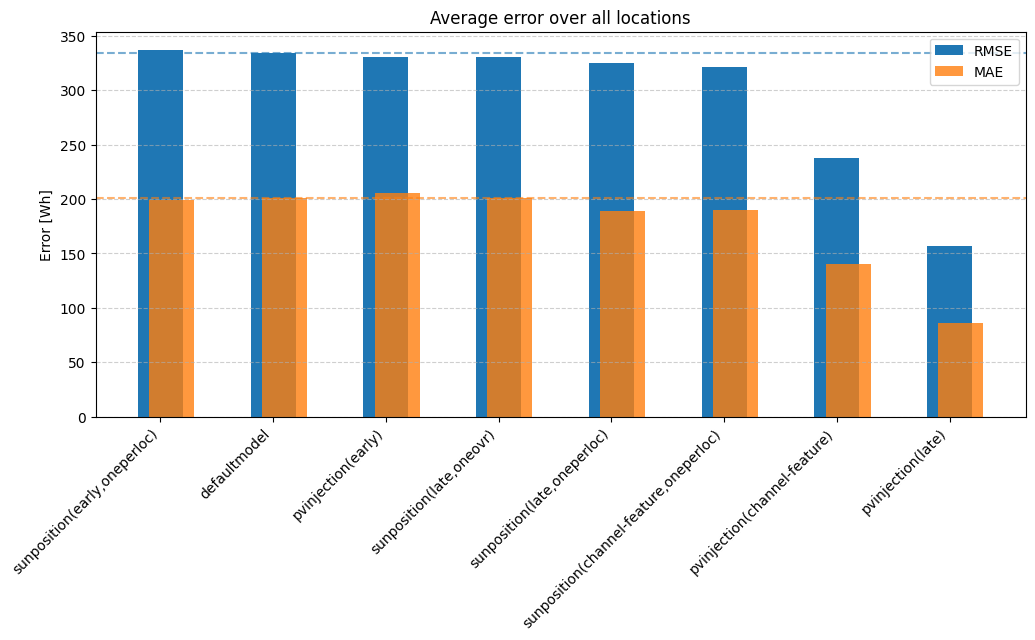

In [15]:
# Reverse sort by RMSE
sorted_indices = np.argsort(rmses)[::-1]
sorted_rmses = np.array(rmses)[sorted_indices]
sorted_maes = np.array(maes)[sorted_indices]
sorted_keys = np.array(list(results.keys()))[sorted_indices]

x = np.arange(len(sorted_rmses))
width = 0.4

plt.figure(figsize=(12, 5))

plt.bar(x, sorted_rmses, width, label='RMSE')
plt.bar(x + 0.1, sorted_maes, width, label='MAE', alpha=0.8)  # Adjust the offset as needed

# add horizontal lines for deafultmodel
idx = np.where(sorted_keys == "seed41-defaultmodel")[0][0]
plt.axhline(sorted_rmses[idx], color='C0', linestyle='--', alpha=0.6)
plt.axhline(sorted_maes[idx], color='C1', linestyle='--', alpha=0.6)

plt.xticks(x, [k[7:] for k in sorted_keys], rotation=45, ha='right')
plt.ylabel('Error [Wh]')

plt.title('Average error over all locations')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# difference to baseline

In [16]:
def plot_diff(a, b, a_name, b_name, with_mae=False):
    plt.figure(figsize=(12, 5))
    
    if with_mae:
        x = np.arange(b.shape[0])  # Numeric positions for x-axis
        width = 0.4  # Width of bars
        plt.bar(x - width/2, a["rmse"] - b["rmse"], width=width, label='MAE')
        plt.bar(x + width/2, a["mae"]- b["mae"], width=width, label='RMSE')
        # plt.bar(x - width/2, a["mae"], width=width, label='MAE')
        # plt.bar(x + width/2, a["rmse"], width=width, label='RMSE')
        plt.xticks(x, b["location"])  # Set x-axis labels to locations
    else:
        plt.bar(b["location"], a["rmse"] - b["rmse"], label='RMSE')
    
    plt.title(f'Improvement of {a_name} over {b_name}')
    plt.xlabel('Model Input')
    plt.ylabel('Error [Wh]')
    
    plt.legend()
    plt.grid(axis='y', linestyle='--')
    plt.show()

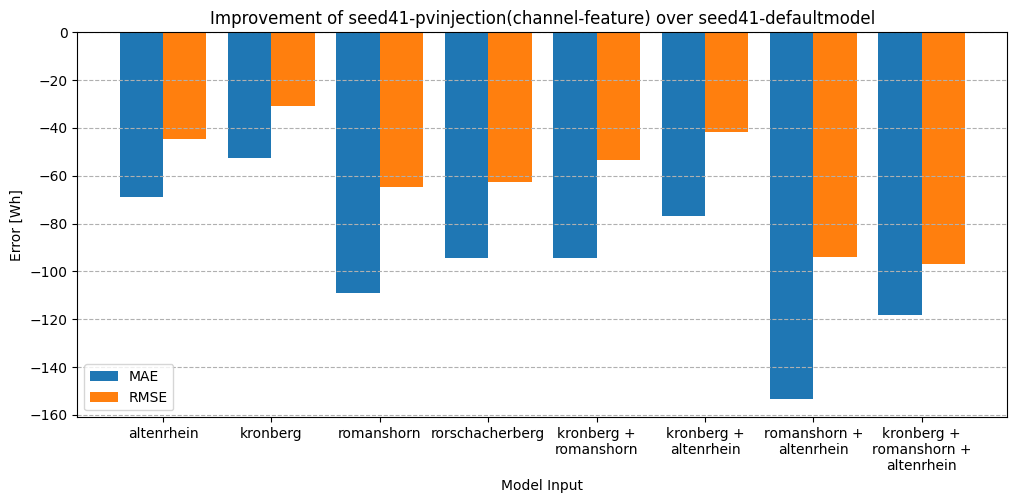

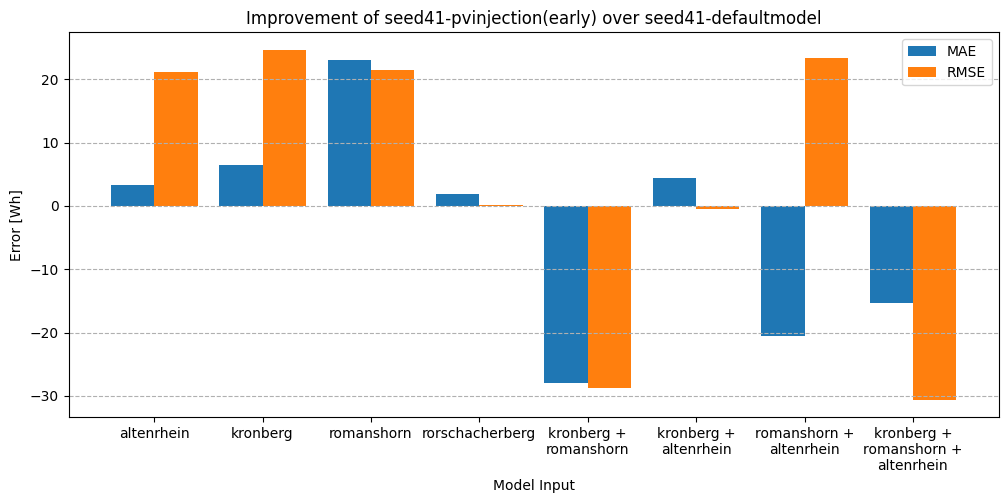

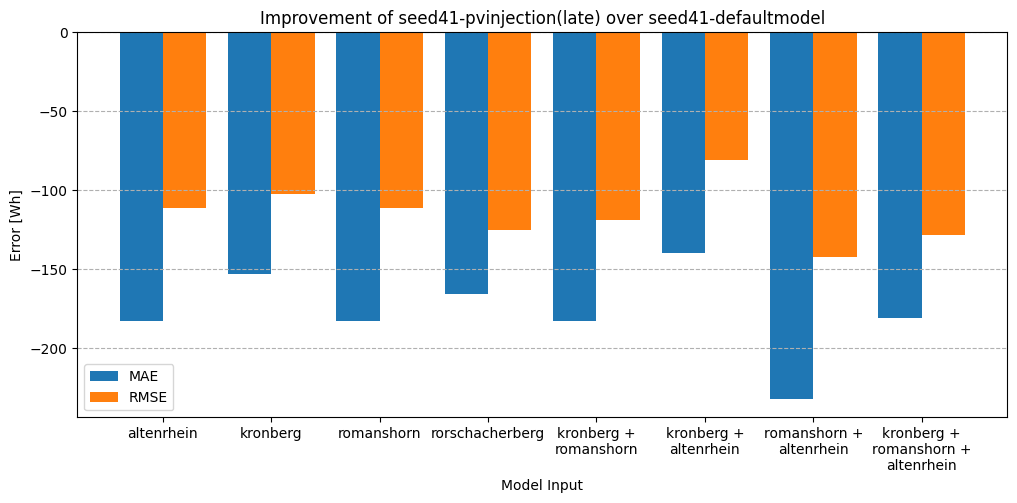

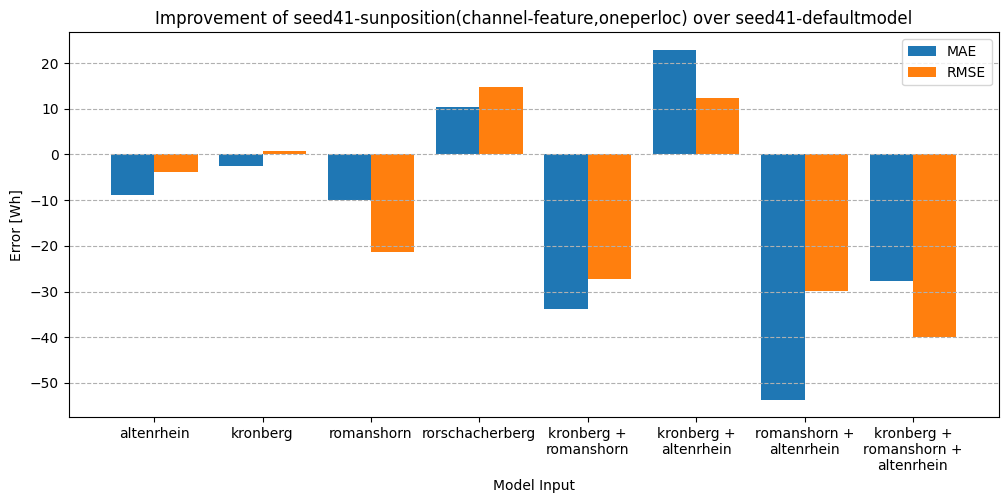

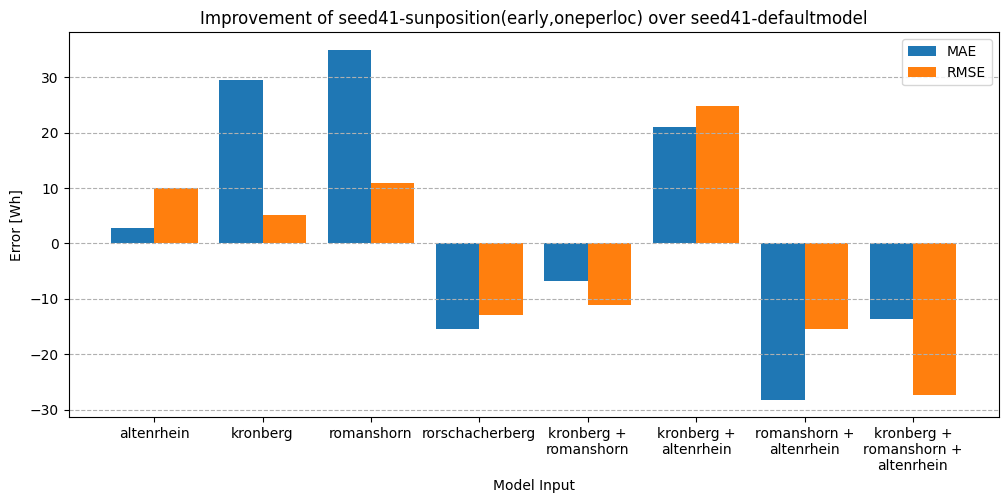

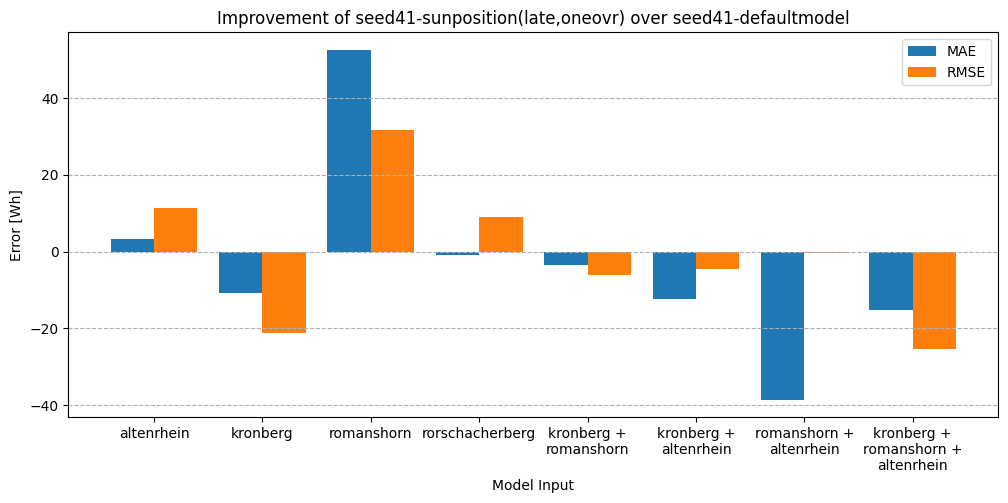

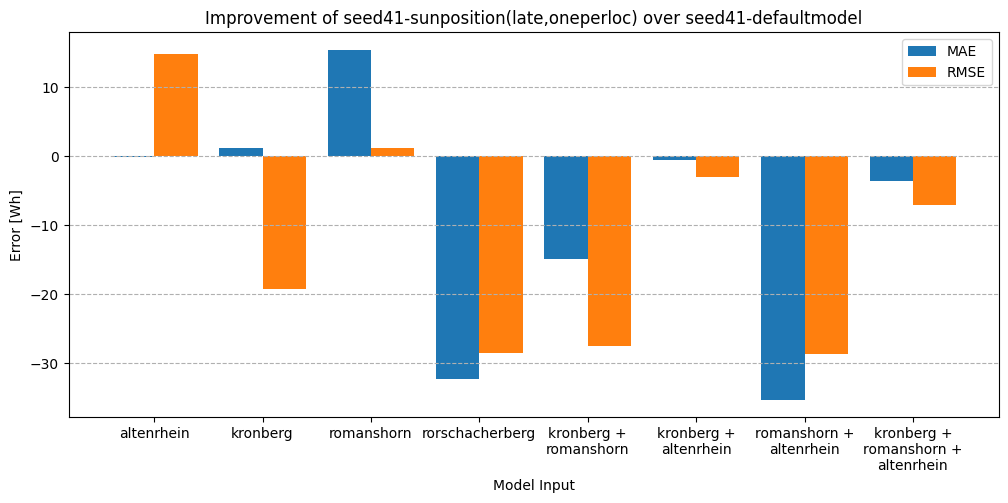

In [17]:
for i, key in enumerate(results.keys()):
    if key == 'seed41-defaultmodel':
        continue
    
    plot_diff(
        results[key], results['seed41-defaultmodel'], 
        key, 'seed41-defaultmodel',
        with_mae = True
    )